# 修正后的阿尔法滤波器

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [16]:
def alpha_filter(src,T):
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros(src.shape,dtype=np.float64)
    if T < 0 or T > 8:
        return dst
    gray_val = 255
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            rgb = np.array([src[i,j],src[i-1,j-1],src[i,j-1],
                    src[i+1,j-1],src[i-1,j],src[i+1,j],
                    src[i-1,j+1],src[i,j+1],src[i+1,j+1]],dtype=np.float64)
#             print(rgb.shape)
            gray = 0.299 * rgb[:,0] + 0.587 * rgb[:,1] + 0.114 * rgb[:,2]
            r = rgb[:,0]
            g = rgb[:,1]
            b = rgb[:,2]
            tr,tg,tb = 0.0,0.0,0.0
            
            for x in range(9):
                for y in range(x + 1,9):
                    tr = r[x]
                    tg = g[x]
                    tb = b[x]
                    if gray[x] > gray[y]:
                        gray[x] = gray[y]
                        gray[y] = gray_val
                        r[x] = r[y]
                        g[x] = g[y]
                        b[x] = b[y]
                        r[y] = tr
                        g[y] = tg
                        b[y] = tb
                        
            if T % 2 != 0:
                T = T - 1
            for m in range(T // 2):
                r[m] = 0
                g[m] = 0
                b[m] = 0
                r[8-m] = 0
                g[8-m] = 0
                b[8-m] = 0
                
            dst[i,j,0] = np.sum(r) / (9 - T)
            dst[i,j,1] = np.sum(g) / (9 - T)
            dst[i,j,2] = np.sum(b) / (9 - T)
            
    return cv2.convertScaleAbs(dst)

In [17]:
dst = alpha_filter(src,1)

Text(0.5,1,'DST')

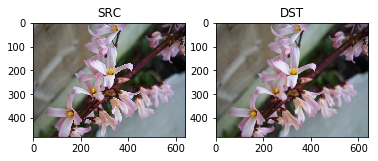

In [18]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST')

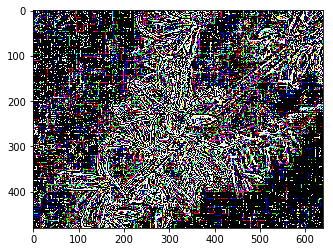

In [19]:
plt.imshow(cv2.convertScaleAbs(dst - src))

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45308397